This file is used to test the offline stream simulator code on queries from the UDL SkySpark InfluxDB

In [1]:
import pandas as pd
import influxdb_client
from datetime import timezone, datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a few variables with the name of your bucket, organization, and token.
bucket = "SKYSPARK"
org = "UBC"
#UDL provides public users READ access to the InfluxDB 2.0 instance via this token
token = "addtokenhere"
url="http://206.12.92.81:8086/"

In [3]:
#Instantiate the client.
client = influxdb_client.InfluxDBClient(url=url, token=token, org=org)

#Create a Flux query.
    #Flux documentation https://docs.influxdata.com/influxdb/v2.0/reference/flux/
    #You can generate Flux query using the Query Builder on http://206.12.92.81:8086/
query = '''from(bucket: "SKYSPARK")
  |> range(start: 2020-07-01T00:00:00Z, stop: 2020-07-31T23:59:59Z)
  |> filter(fn: (r) => r["_measurement"] == "READINGS")
  |> filter(fn: (r) => r["siteRef"] == "Pharmacy")
  |> filter(fn: (r) => r["uniqueID"] == "r:p:ubcv:r:21432e1c-45d33081 Pharmacy Cooling Plant CH-1 CHLR1_COP" or r["uniqueID"] == "r:p:ubcv:r:21433651-788ebe09 Pharmacy Cooling Plant CH-2 CHLR2_COP" or r["uniqueID"] == "r:p:ubcv:r:21433667-2be787b5 Pharmacy Cooling Plant CH-3 CHLR3_COP" or r["uniqueID"] == "r:p:ubcv:r:21433683-704eac70 Pharmacy Cooling Plant CH-4 CHLR4_COP")
  |> filter(fn: (r) => r["_field"] == "val_num")'''

##Instantiate the query client. Specify org and query.
result = client.query_api().query_data_frame(org=org, query=query)

In [4]:
result

,result,table,_start,_stop,_time,_value,_field,_measurement,equipRef,groupRef,navName,siteRef,typeRef,uniqueID,unit
0,_result,0,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-01 00:00:00+00:00,3.797291,val_num,READINGS,Cooling Plant CH-1,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR1_COP,r:p:ubcv:r:21432e1c-45d33081 Pharmacy Cooling ...,_
1,_result,0,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-01 00:10:00+00:00,4.521705,val_num,READINGS,Cooling Plant CH-1,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR1_COP,r:p:ubcv:r:21432e1c-45d33081 Pharmacy Cooling ...,_
2,_result,0,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-01 00:20:00+00:00,4.830280,val_num,READINGS,Cooling Plant CH-1,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR1_COP,r:p:ubcv:r:21432e1c-45d33081 Pharmacy Cooling ...,_
3,_result,0,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-01 00:30:00+00:00,5.007089,val_num,READINGS,Cooling Plant CH-1,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR1_COP,r:p:ubcv:r:21432e1c-45d33081 Pharmacy Cooling ...,_
4,_result,0,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-01 00:40:00+00:00,4.825974,val_num,READINGS,Cooling Plant CH-1,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR1_COP,r:p:ubcv:r:21432e1c-45d33081 Pharmacy Cooling ...,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17823,_result,3,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-31 23:10:00+00:00,0.000000,val_num,READINGS,Cooling Plant CH-4,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR4_COP,r:p:ubcv:r:21433683-704eac70 Pharmacy Cooling ...,_
17824,_result,3,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-31 23:20:00+00:00,0.000000,val_num,READINGS,Cooling Plant CH-4,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR4_COP,r:p:ubcv:r:21433683-704eac70 Pharmacy Cooling ...,_
17825,_result,3,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-31 23:30:00+00:00,0.000000,val_num,READINGS,Cooling Plant CH-4,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR4_COP,r:p:ubcv:r:21433683-704eac70 Pharmacy Cooling ...,_
17826,_result,3,2020-07-01 00:00:00+00:00,2020-07-31 23:59:59+00:00,2020-07-31 23:40:00+00:00,0.000000,val_num,READINGS,Cooling Plant CH-4,Pharmacy Hydronic Systems,cop,Pharmacy,CHLR4_COP,r:p:ubcv:r:21433683-704eac70 Pharmacy Cooling ...,_


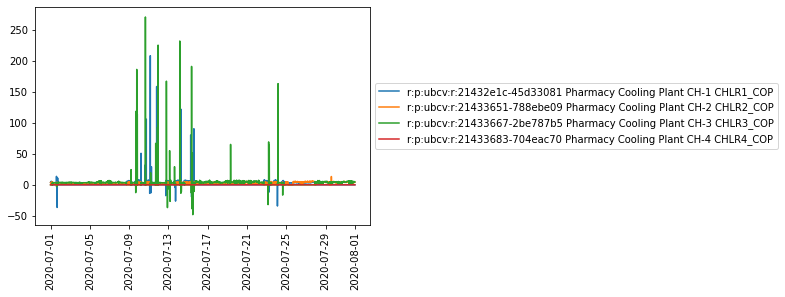

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
for uid,dfm in result.groupby('uniqueID'):
    ax.plot(dfm['_time'],dfm['_value'],label=uid)
    # Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation='vertical')
plt.show()

In [6]:
# Just load a single uniqueID
for uid,dfm in result.groupby('uniqueID'):
    break

In [7]:
X = dfm

In [8]:
# Import streaming simulation package
import sys
sys.path.append('../simulate')
import simulate

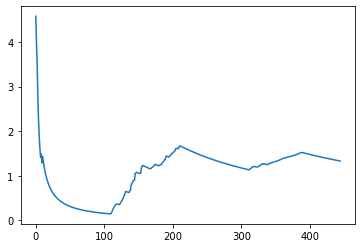

In [9]:
# Test cumulative functionality (calculating the cumulative mean)
# Default batch size is 10
results = simulate.simulate_stream(X)
fix, ax = plt.subplots()
ax.plot(results['batch_num'], results['model_results'])
plt.show()

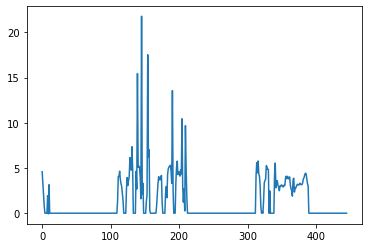

In [10]:
# Test non-cumulative functionality (calculating the batch mean)
# Default batch size is 10
results = simulate.simulate_stream(X, cumulative=False)
fix, ax = plt.subplots()
ax.plot(results['batch_num'], results['model_results'])
plt.show()